In [1]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline


(103125, 58, 3)


/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


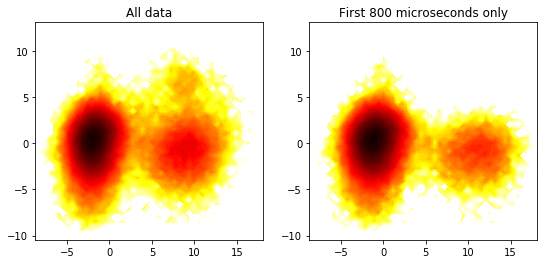

In [2]:
# DE SHAW DATA
f = Fasu('../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca_1ms_dt10ns.xtc',
         top='../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb')#,selection='name CA') #note that analysis fails when use selection='name CA'
c = Cofasu(f)

print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

DE_plot = 1

if DE_plot == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # note sure why these plots come out flipped right to left compared to plots prof Laughton supplied 

In [3]:
# this section is just fuctions that will be used later for analysis and automation
# newly added comments in document should make it clear the purpose of each 
# set of commands being executed. if not we can discuss at meeting so I can 
# fix that in the next iteration of data analysis updates. 

def run_fasu_tot(l,path,top,cu,iters,fileprefix,fileExt,offset=0):
    offset=0
    for i in range(0,iters):
        for k in range(cu):                
            string = path+"/"+fileprefix+"-"+str(i)+"_"+str(k)+fileExt
            ss = path+"/"
            if(fileprefix=="coco_out"):
                string = path+"/"+fileprefix+"_"+str(i)+"_"+str(k)+fileExt
            #str_list[i][k] = string
            #print string
            if(os.path.isfile(string)==True):
                #print string
                l[i][k] = Fasu(string,top=top, selection='name CA')
    return l;


def cofasu_flex_tot(cByIters,l,offset=0):
    l_row = []

    for i in range(0,len(l)): #[4, 9, 14, 19]
        
        for j in range(len(l[i])):
            l_row.append(l[i][j])
        #print l_row
    cByIters[i] = Cofasu(l_row)
        
    return cByIters;


def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,cap,offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[0,3]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    fig = plt.figure()
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'b.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'y.')
    return pByIters;

###################################################################################
# analysis of .log files fxns

def eq_log_posre_all_itersN(M,iters,pathCu,prj):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="eq-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[399].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q):
                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        M.append(m)


    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 2))
    plt.title(prj+"     "+"eq_log_posre_all_iters")
    #plt.plot(float(m[7][0]),float(m[7][11]),'go')
    for lm in range(len(M)):
        for i in range(len(M[lm])-1):#len(m[0])):
            #print i,j
            #print m[i][0], m[i][11]
            plt.plot(float(M[lm][i][0]),float(M[lm][i][11])/float(M[lm][0][11]),cul[lm])
            #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return M;

def eq_log_posre_all_iters(M,iters,pathCu,prj):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="eq-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[399].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q):
                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        M.append(m)


    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    plt.title(prj+"     "+"eq_log_posre_all_iters")
    #plt.plot(float(m[7][0]),float(m[7][11]),'go')
    for lm in range(len(M)):
        for i in range(len(M[lm])-1):#len(m[0])):
            #print i,j
            #print m[i][0], m[i][11]
            plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
            #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return M;

######################################## min-*_9.log ################################

def min_log_posre_all_iters(N,iters,pathCu,prj):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="min-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[358].split()
        z=w[362].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q and w[i+3].split()==z):

                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        N.append(m)
        
    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    plt.title(prj+"     "+"min_log_posre_all_iters")
    #plt.plot(float(m[7][0]),float(m[7][11]),'go')
    for lm in range(len(N)):
        for i in range(len(N[lm])-1):#len(m[0])):
            #print i,j
            #print m[i][0], m[i][11]
            plt.plot(float(N[lm][i][0]),float(N[lm][i][11]),cul[lm])
            #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return N;

def min_log_posre_all_itersN(N,iters,pathCu,prj):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="min-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[358].split()
        z=w[362].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q and w[i+3].split()==z):

                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        N.append(m)
        
    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    plt.title(prj+"     "+"min_log_posre_all_iters")
    #plt.plot(float(m[7][0]),float(m[7][11]),'go')
    for lm in range(len(N)):
        for i in range(len(N[lm])-1):#len(m[0])):
            #print i,j
            #print m[i][0], m[i][11]
            plt.plot(float(N[lm][i][0]),float(N[lm][i][11])/float(N[lm][0][11]),cul[lm])
            #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return N;


In [4]:
#######################################################################

#######################################################################

cu = 20 
iters = 20
top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'
prj = 'p07e01_k12_01000_k34_01000_4d/zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0003-pilot.0000/'
#tar = '/zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017372.0005-pilot.0000/'
path   = atm+prj
pathSt = atm+prj+"staging"
pathCu = atm+prj+"cu009"
#print path



l = np.empty((iters,cu),dtype=object) 
offset=0

# COLLECT FASU and COFASU DATA
# same thing that Prof. Laughton did in his example analysis files from the github just I had to make
# minor changes for the different settings and made a function so it was easier to automate analysis 

# Fasu and Cofasu of the md-[0-iters]_[0-cu].xtc files - so can compare data in PCA space vs DE Shaw data
fileExt = '.xtc'
fileprefix = 'md'
run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
cByIters = [[0 for i in range(cu)] for j in range(iters)]
cofasu_flex_tot(cByIters,l,offset);

# Fasu and Cofasu of the coco_out_[0-iters]_[0-cu].gro files 
# so we can see where coco generated strucutres fall in the PCA space compared to the 
# final results of the full workflows, md-[0-iters]_[0-cu].xtc
# This will let us see how far the bpti.gro strucutre is "pulled" towards the coco generated strucutures
fileExt = '.gro'
fileprefix = 'coco_out'
run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
coco_cByIters = [[0 for i in range(cu)] for j in range(iters)]
cofasu_flex_tot(coco_cByIters,l,offset);

# # Fasu and Cofasu of the eq-[0-iters]_[0-cu].gro files ( the output files of kernel 4 )
# Since this is the output of K4 it is the end of the "pull bpti.gro towards coco structure"
# part of the code. Should let us evaluate how effective using stronger spring constants
# or longer times, to pull bpti.gro towards the coco strucutres 
fileExt = '.gro'
fileprefix = 'eq'
run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
eq_cByIters = [[0 for i in range(cu)] for j in range(iters)]
cofasu_flex_tot(eq_cByIters,l,offset);



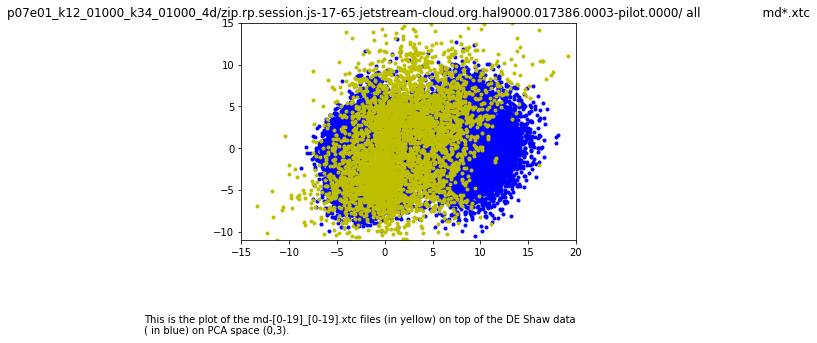

In [5]:
#PLOTTING DATA IN PCA SPACE
fileExt = '.xtc'
fileprefix = 'md'
cap ='''
This is the plot of the md-[0-19]_[0-19].xtc files (in yellow) on top of the DE Shaw data
( in blue) on PCA space (0,3). '''

pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,cap)

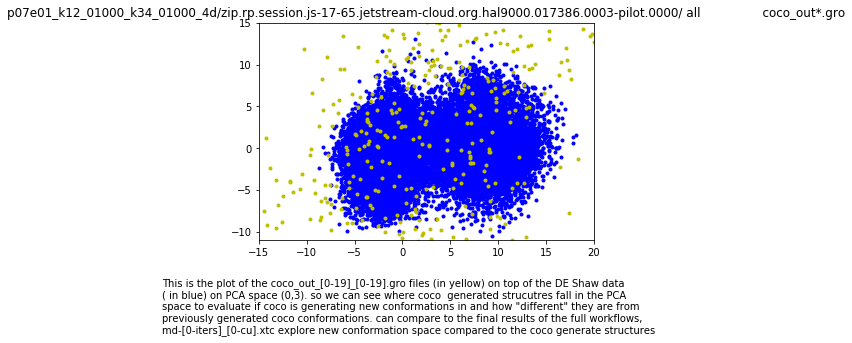

In [6]:
fileExt = '.gro'
fileprefix = 'coco_out'
cap ='''
This is the plot of the coco_out_[0-19]_[0-19].gro files (in yellow) on top of the DE Shaw data 
( in blue) on PCA space (0,3). so we can see where coco  generated strucutres fall in the PCA 
space to evaluate if coco is generating new conformations in and how "different" they are from
previously generated coco conformations. can compare to the final results of the full workflows,
md-[0-iters]_[0-cu].xtc explore new conformation space compared to the coco generate structures'''
coco_pByIters = plot_cofasu_tot(p,coco_cByIters,iters,prj,fileprefix,fileExt,cap)

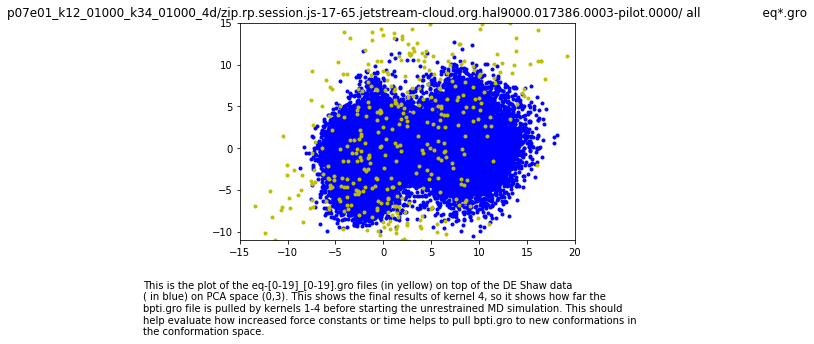

In [7]:
fileExt = '.gro'
fileprefix = 'eq'
cap = '''This is the plot of the eq-[0-19]_[0-19].gro files (in yellow) on top of the DE Shaw data 
( in blue) on PCA space (0,3). This shows the final results of kernel 4, so it shows how far the 
bpti.gro file is pulled by kernels 1-4 before starting the unrestrained MD simulation. This should
help evaluate how increased force constants or time helps to pull bpti.gro to new conformations in 
the conformation space.'''

eq_pByIters = plot_cofasu_tot(p,eq_cByIters,iters,prj,fileprefix,fileExt, cap)

In [12]:
#PCA EVALS - GIVES IMPORTANCE OF axis for variance
print "DE shaw p.evals"
print p.evals 

print "****************"
print "our data pp.evals"
print "****************"

print "cByIters - PCA results for md-[0-19]_[0-19].xtc files "
print cByIters[19].shape
xtc_p = pca.fromtrajectory(cByIters[19],req_evecs=5)
print xtc_p.evals
print " "

print "coco_cByIters - PCA results for coco_out_[0-19]_[0-19].gro files"
print coco_cByIters[19].shape
coco_p = pca.fromtrajectory(coco_cByIters[19],req_evecs=5)
print coco_p.evals
print " "

print "eq_cByIters - PCA results for eq-[0-19]_[0-19].gro files"
print eq_cByIters[19].shape
eq_p = pca.fromtrajectory(eq_cByIters[19],req_evecs=5)
print eq_p.evals
print " "


# goal of this section is to just show how variance is captured by PCA in DE Shaw data 
# and our data. For use the first 5 PCA axis are the most important. Wanted to see 
# if variance was different in the three files and how they compare to variance in 
# the DE Shaw data. 

DE shaw p.evals
[ 17.03955661  10.25175029  10.17209174   4.82359665   3.77199073
   2.90853845   2.82133768   2.21039408   1.79439309   1.4943171
   1.40306523   1.32282016   1.00759207   0.94518943   0.77258149
   0.74642084   0.64891203   0.62547259   0.60379367   0.5464462
   0.53705644   0.51098362   0.46429252   0.43365739   0.39878905
   0.38368622   0.36693923   0.35251259]
****************
our data pp.evals
****************
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
[ 55.11643954  47.22450634  18.428122     8.97058291   5.163873  ]
 
coco_cByIters - PCA results for coco_out_[0-19]_[0-19].gro files
(400, 58, 3)
[ 221.86185935  181.35068786   75.17239594   48.05070753    8.4117862 ]
 
eq_cByIters - PCA results for eq-[0-19]_[0-19].gro files
(400, 58, 3)
[ 127.91471111  108.92253951   45.54753947   27.05091401    6.88274937]
 


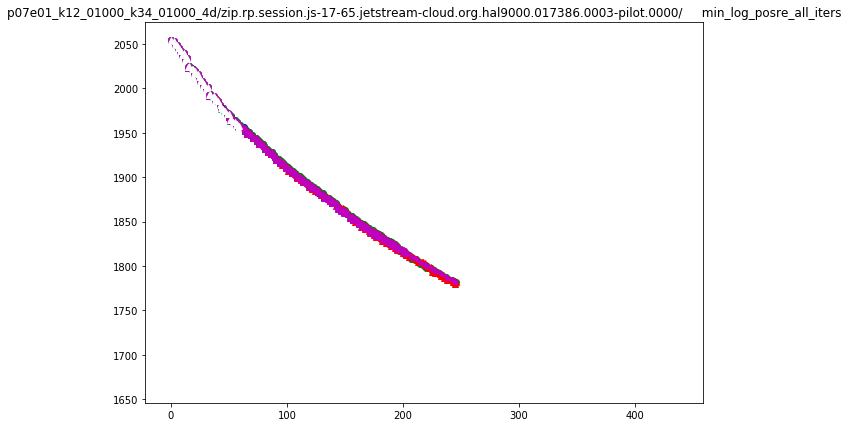

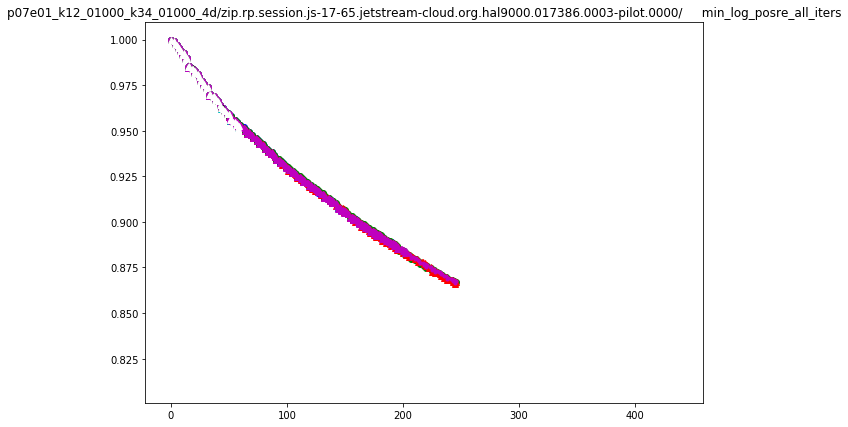

In [9]:
#################### analysis of min*.log and eq*.log files #####################
# Position restraint energy vs time data 
#################################################################################

# plots of position restrain energy change over time for K1/K2 
# uses min-[0-19]_9.log for plotting. 
N=[]
# plots raw pos res energy 
# x axis is time steps and y axis is KJ/mol
min_log_posre_all_iters(N,iters,pathCu,prj);
N=[]
# plots pos res energy normalized by the pos res energy at step=0
# x axis is time steps and y axis is KJ/mol
min_log_posre_all_itersN(N,iters,pathCu,prj);





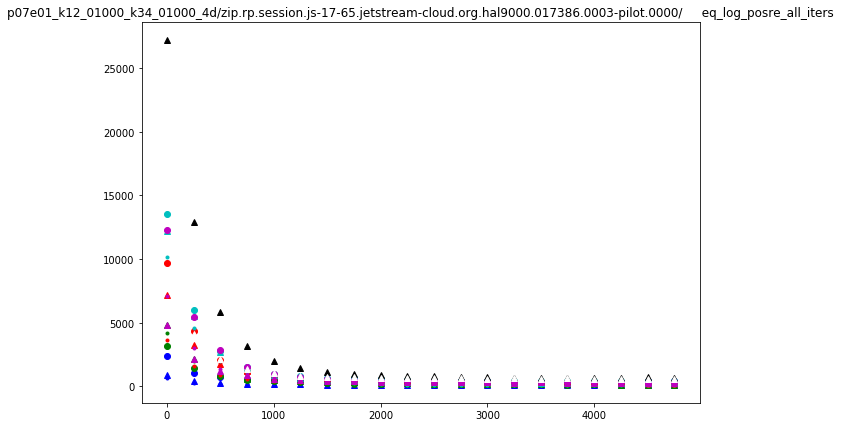

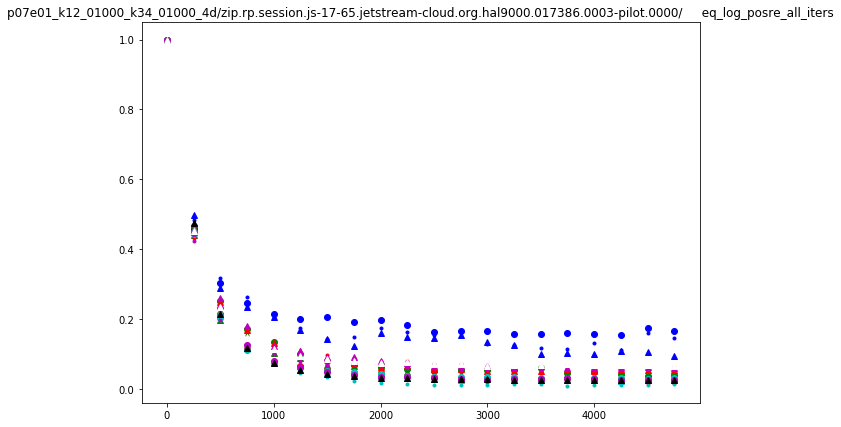

In [10]:
# plots of position restrain energy change over time for K3/K4 
# uses eq-[0-19]_9.log for plotting. 
M = []
# plots raw pos res energy 
# x axis is time steps and y axis is KJ/mol
eq_log_posre_all_iters(M,iters,pathCu,prj);
M = []
# plots pos res energy normalized by the pos res energy at step=0
# # x axis is time steps and y axis is KJ/mol
eq_log_posre_all_itersN(M,iters,pathCu,prj);

In [15]:
for i in range(len(p.evecs)):
    for j in range(len(xtc_p.evecs)):
        #print "i= ",i, "j= ", j 
        cow = np.dot(p.evecs[i],xtc_p.evecs[j])
        if abs(cow) > 0.800 and abs(cow) < 1.200:
            print "i= ",i, "j= ", j 
            print cow

                                               
px , py, dex, dey 1 1 1 1
 resulting plot below                          


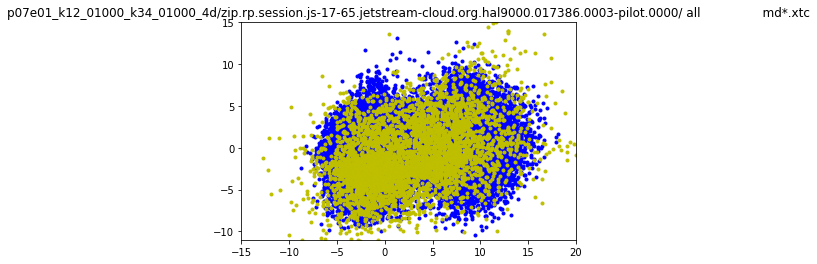

In [20]:
def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,px,py,dex,dey,offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    print "                                               "
    print "px , py, dex, dey", px, py, dex, dey
    print " resulting plot below                          "
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[0,3]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    plt.figure()
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    plt.plot(dex*p.projs[0],dey*p.projs[3], 'b.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(px*pByIters[i][1]+2.5 , py*pByIters[i][0]-2.5 , 'y.')
    return pByIters;

fileExt = '.xtc'
fileprefix = 'md'
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1)



pcax =  0 pcay =  1
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
 
pcax =  0 pcay =  2
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
 
pcax =  0 pcay =  3
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
 
pcax =  1 pcay =  2
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
 
pcax =  1 pcay =  3
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
 
pcax =  2 pcay =  3
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
 


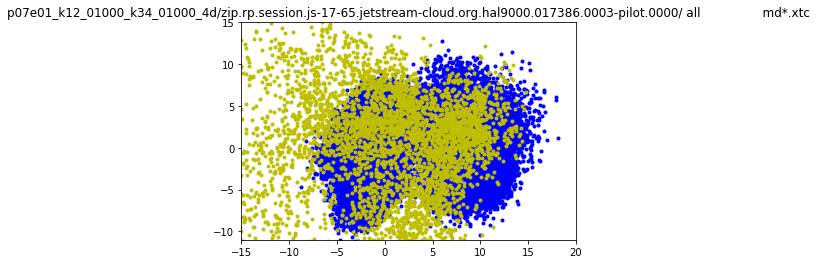

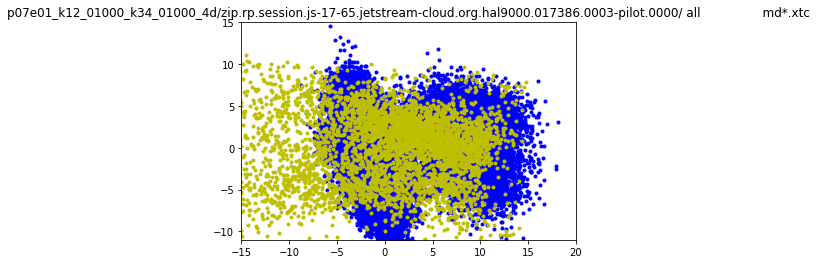

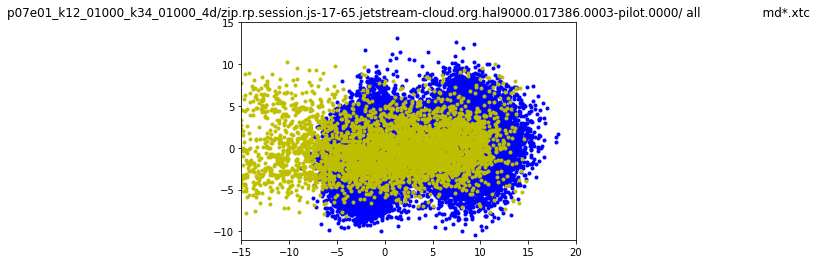

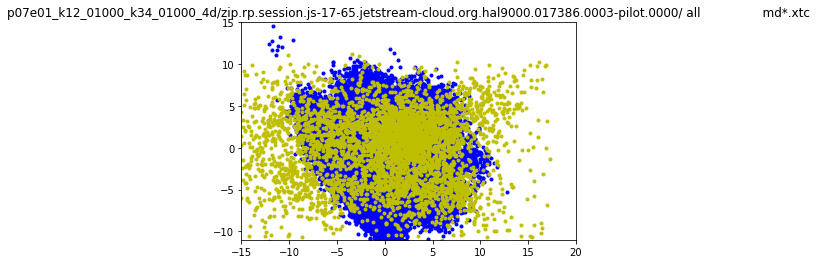

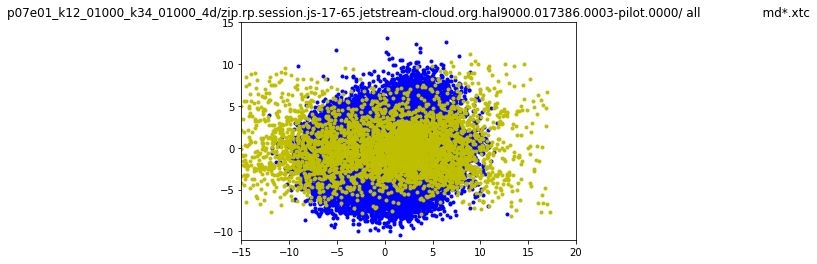

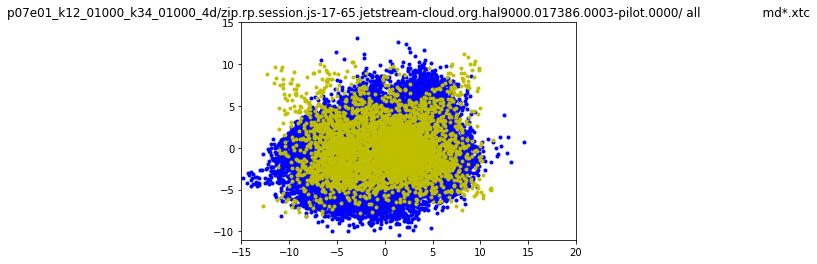

In [21]:
def plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,px,py,dex,dey,pcax,pcay,offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    #print "                                        
    print "cByIters - PCA results for md-[0-19]_[0-19].xtc files "
    #print p[0].shape
    print cByIters[19].shape
    xtc_p = pca.fromtrajectory(cByIters[19])
    #print xtc_p.shape
    print " "

    plt.figure()
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    plt.plot(dex*p.projs[pcax],dey*p.projs[pcay], 'b.')
    plt.plot(dex*xtc_p.projs[pcax],dey*xtc_p.projs[pcay], 'y.')
    return ;


fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 0,1
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)

fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 0,2
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)

fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 0,3
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)
fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 1,2
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)
fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 1,3
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)
fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 2,3
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_xtc(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)

pcax =  0 pcay =  1
pcax =  0 pcay =  2
pcax =  0 pcay =  3
pcax =  1 pcay =  2
pcax =  1 pcay =  3
pcax =  2 pcay =  3


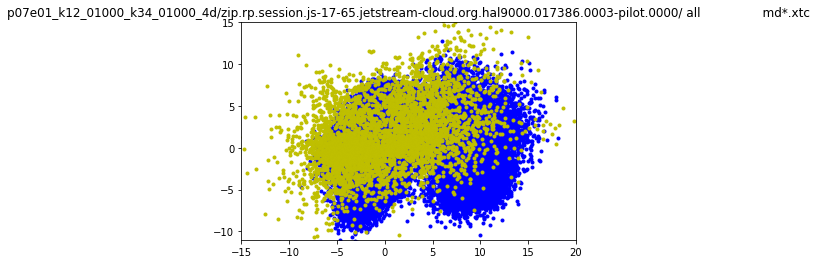

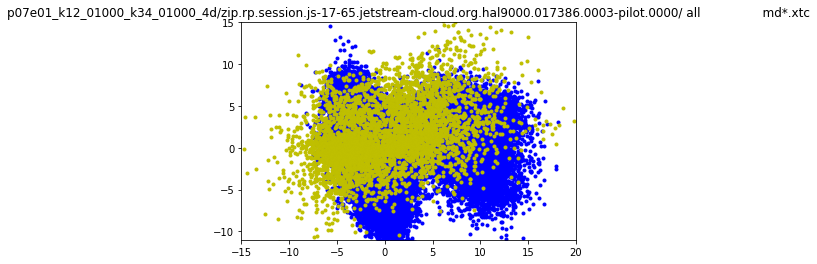

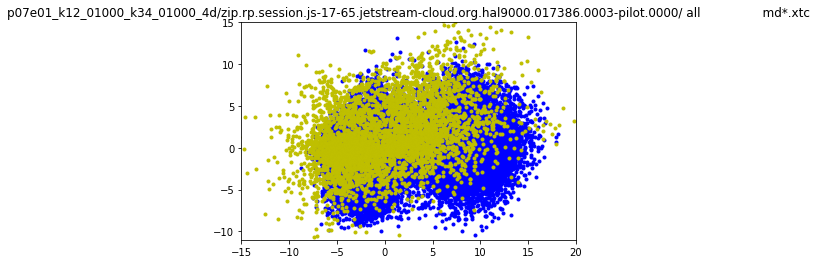

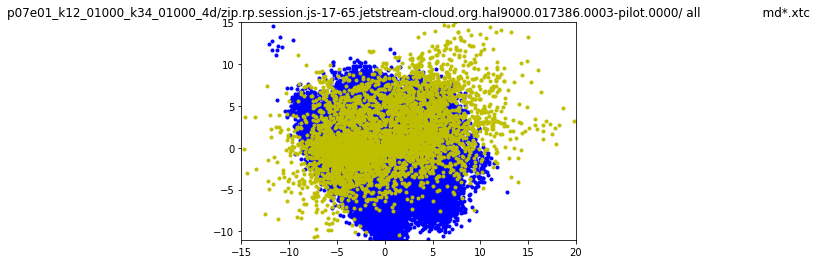

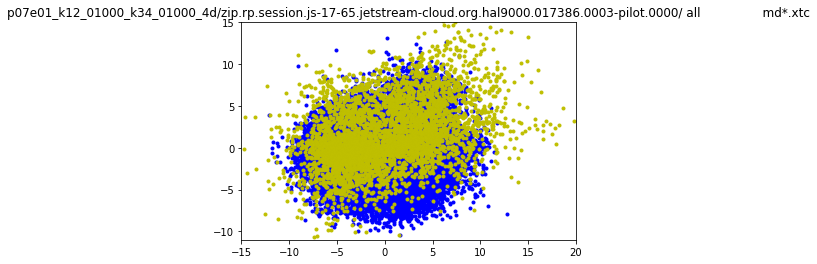

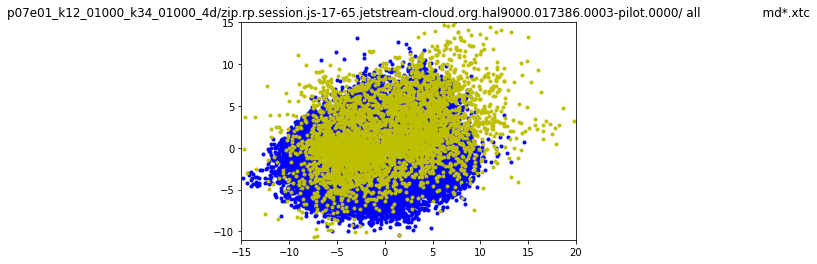

In [22]:
def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,px,py,dex,dey,pcax,pcay,offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    #print "                                               "
    #print "px , py, dex, dey", px, py, dex, dey
    #print " resulting plot below                          "
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[3,0]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    plt.figure()
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    plt.plot(dex*p.projs[pcax],dey*p.projs[pcay], 'b.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(px*pByIters[i][0] , py*pByIters[i][1] , 'y.')
    return pByIters;

fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 0,1
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)

fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 0,2
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)

fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 0,3
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)
fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 1,2
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)
fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 1,3
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)
fileExt = '.xtc'
fileprefix = 'md'
pcax,pcay= 2,3
print "pcax = ", pcax, "pcay = ", pcay 
pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,1,1,1,1,pcax,pcay)

/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


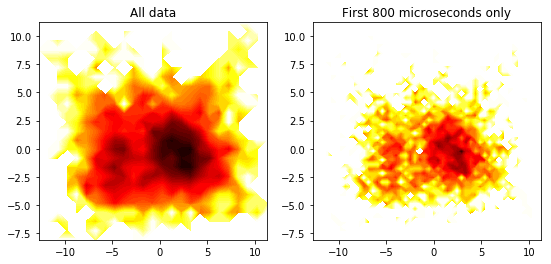

In [24]:
    pjsx=2
    pjsy=3
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=25)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(4400, 58, 3)
[ 55.11643433  47.22450814  18.42812292   8.97058143   5.16387199]
 


/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:6

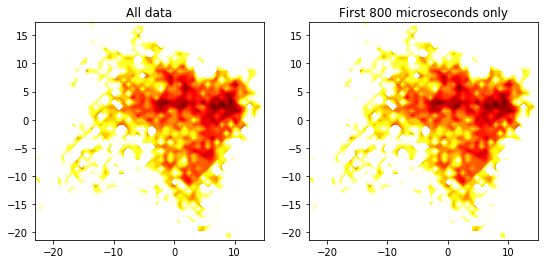

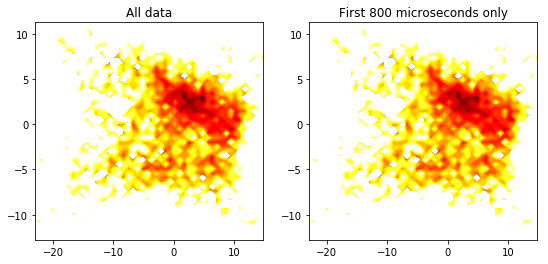

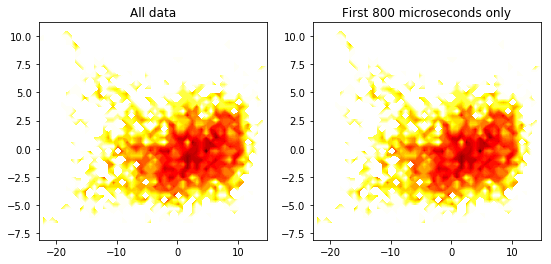

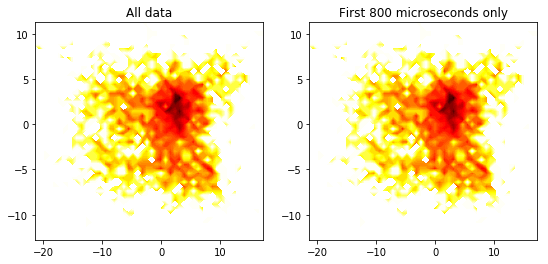

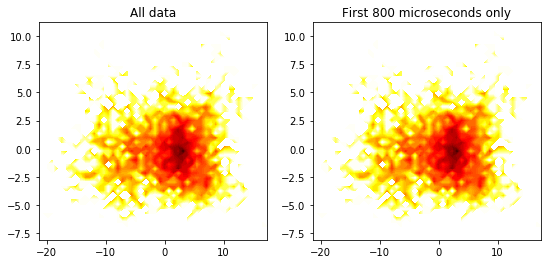

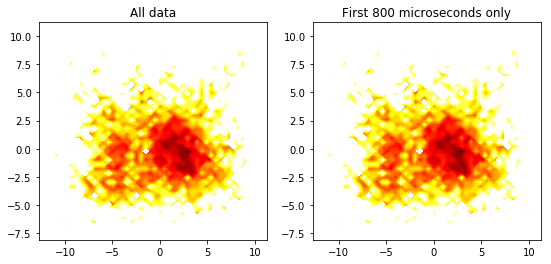

In [25]:
    print "cByIters - PCA results for md-[0-19]_[0-19].xtc files "
    print cByIters[19].shape
    xtc_p = pca.fromtrajectory(cByIters[19],req_evecs=5)
    print xtc_p.evals
    print " "
    
    
    pjsx=0
    pjsy=1
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    pjsx=0
    pjsy=2
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    pjsx=0
    pjsy=3
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    pjsx=1
    pjsy=2
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    pjsx=1
    pjsy=3
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    pjsx=2
    pjsy=3
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*xtc_p.projs[pjsx],xtc_p.projs[pjsy], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(xtc_p.projs[pjsx][:80000],xtc_p.projs[pjsy][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)